In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data Analysis on the most popular Supermarket Sales DataSet on Kaggle

#### SUMMARY: examining the various aspects of this very popular and most downloaded dataset on Kaggle, the conclusion that has been reached is that this dataset is not very good and most likely falsified/manually constructed and not based on real data. Analysis was desired on profitability and revenues however this is not possible.
Points that have considered to reach this conclusion:
1) Exactly 1000 sales entries for a 3 month sales period. Possible? yes but very unlikely
2) Gender split is near 50/50 on sales
3) Sales transactions is split roughly proportionate between the 3 branches
4) Gross margin percentage is the same for all product lines
5) Sales across all products lines are also roughly portionate
6) Payment methods across all products lines are also roughly portionate
7) Gross income for some reason is the same for all product lines
8) Gross Income for some reason equals 'tax of 5%' meaning profitability across all sales is zero. How is this possible?

Is the dataset useful in any sense? Probably only to practice data analysis techniques but not taken seriously.

The only redeeming aspect of the dataset is examining the time of purchases where it seems to follow some real life logic.

In [3]:
data = pd.read_csv('supermarket_sales.csv') #data sourced from Kaggle - https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales

In [4]:
data_v3 = pd.read_csv('supermarket_sales.csv') #data sourced from Kaggle - https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales

# Exploratory Data Analysis

In [5]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   object        
 11  Time                     1000 non-null   datetime64[ns]
 12  Payment                  1000 non-n

In [7]:
data.shape

(1000, 17)

In [8]:
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [9]:
data.isnull().sum() #Data happens to have no null values - great!

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [10]:
data[data.duplicated()]

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating


In [11]:
data.duplicated().sum() # no duplicate rows

0

In [12]:
data_v2 = data.copy()

In [13]:
data_v2.shape

(1000, 17)

In [14]:
data_v2.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [15]:
data_v2['Profit'] = data_v2['gross income'] - data_v2['Tax 5%']

In [16]:
data_v2.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Profit
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,0.0
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,0.0
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,0.0
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,0.0
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,0.0


In [17]:
data_v2['Profit'].nunique() ## Gross Income for some reason equals tax of 5%

1

In [18]:
data_v2['gross margin percentage'].nunique() ## for some reason, all products have the same gross margin percentage

1

In [19]:
data['Time'] = pd.to_datetime(data['Time']) 
#Convert Time column to date time format so analysis can be done on the time of purchase

C:\Users\ton77\AppData\Local\Temp\ipykernel_1764\3761492059.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Time'] = pd.to_datetime(data['Time'])


In [20]:
data['Hour'] = data['Time'].dt.hour

In [21]:
data['Invoice ID'].nunique()

1000

# Univariate Data Analysis

#### Branch

In [22]:
data['Branch'].nunique()

3

In [23]:
data['Branch'].value_counts()

Branch
A    340
B    332
C    328
Name: count, dtype: int64

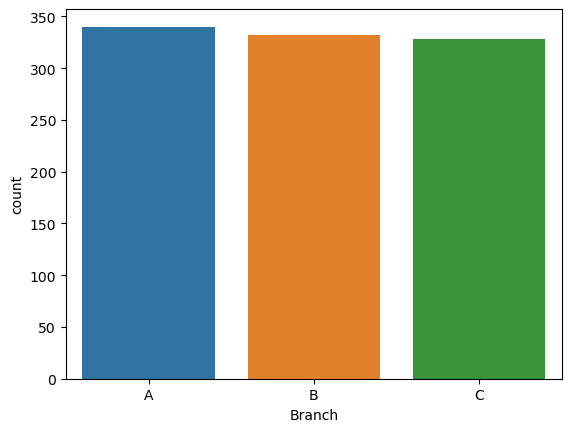

In [24]:
sns.countplot(x='Branch', data=data, order = ['A', 'B', 'C']); 
#Similiar number of customers purchasing from the 3 different branches during the 3 months of data collection

#### City

In [25]:
data['City'].nunique()

3

In [26]:
data['City'].value_counts()

City
Yangon       340
Mandalay     332
Naypyitaw    328
Name: count, dtype: int64

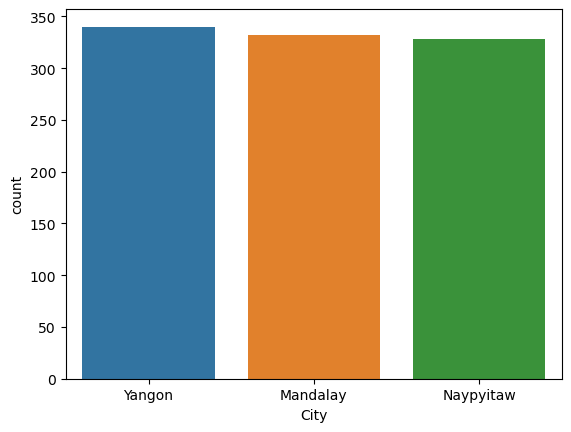

In [27]:
sns.countplot(x='City', data=data, order = ['Yangon','Mandalay','Naypyitaw']);

#### Customer Type

In [28]:
data['Customer type'].nunique()

2

In [29]:
data['Customer type'].value_counts()

Customer type
Member    501
Normal    499
Name: count, dtype: int64

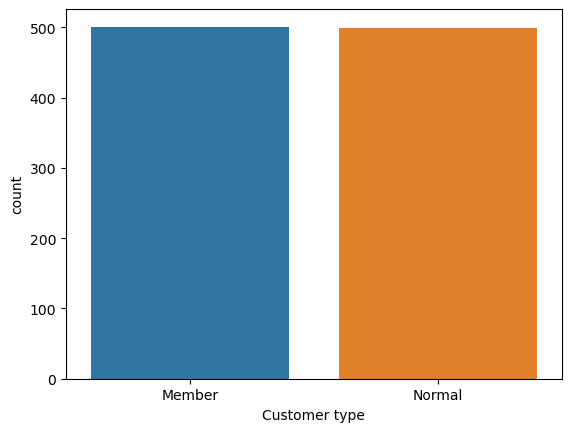

In [30]:
sns.countplot(x='Customer type', data=data);
# Only roughly half of customers are members, could more initiative be introduced to convert customers to become members?
# Discounts? Benefits? Customer loyalty programs

#### Gender

In [31]:
data['Gender'].value_counts()

Gender
Female    501
Male      499
Name: count, dtype: int64

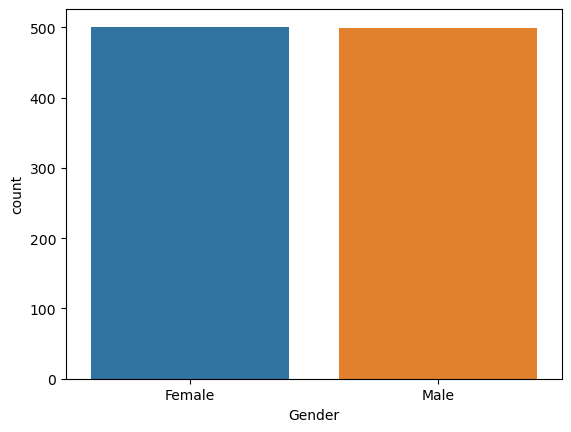

In [32]:
sns.countplot(x='Gender', data=data);
# Customers are split roughly 50/50 as female and male

#### Product Line

In [33]:
data['Product line'].value_counts()

Product line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: count, dtype: int64

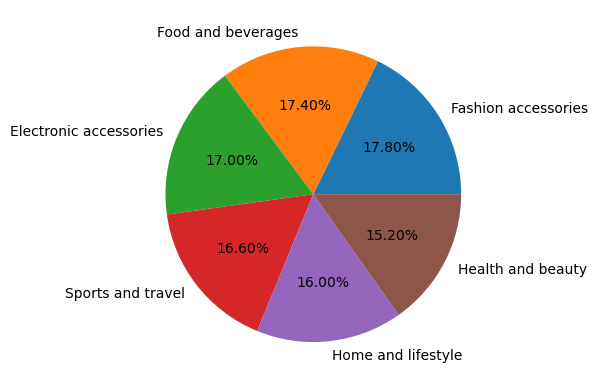

In [34]:
data['Product line'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%')
plt.ylabel('')
plt.show()
# customers purchasing from the categories are roughly in similiar proportions

#### Payment

In [35]:
data['Payment'].value_counts()

Payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64

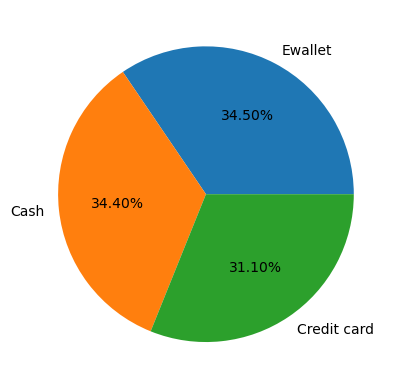

In [36]:
data['Payment'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%')
plt.ylabel('')
plt.show()
# payment method used is also in roughly similiar proportion

#### Customer experience - rating

In [36]:
data['Rating'].value_counts()

Rating
6.0     26
6.6     24
4.2     22
9.5     22
6.5     21
        ..
4.0     11
5.3     11
8.3     11
4.6      8
10.0     5
Name: count, Length: 61, dtype: int64

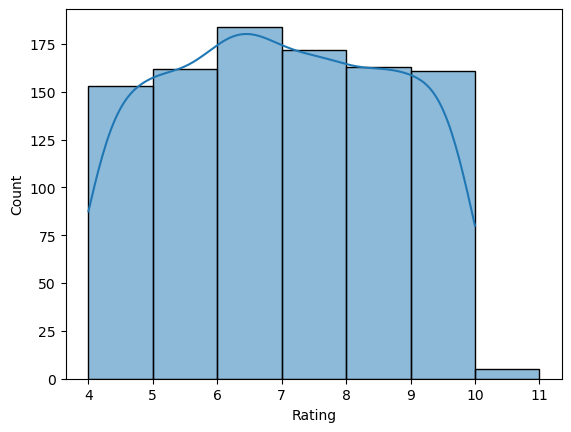

In [37]:
sns.histplot(x='Rating', data=data, kde=True, bins=[4,5,6,7,8,9,10,11]);
# Reviews from customers are split across from 4 to 10

#### Time of purchasing

In [38]:
data['Hour'].value_counts()

Hour
19    113
13    103
15    102
10    101
18     93
11     90
12     89
14     83
16     77
20     75
17     74
Name: count, dtype: int64

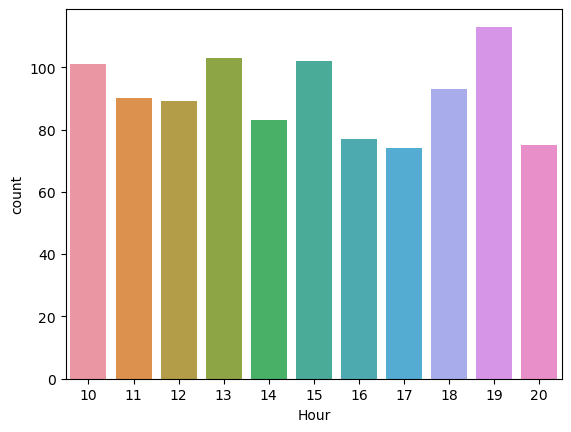

In [39]:
sns.countplot(x='Hour', data=data);

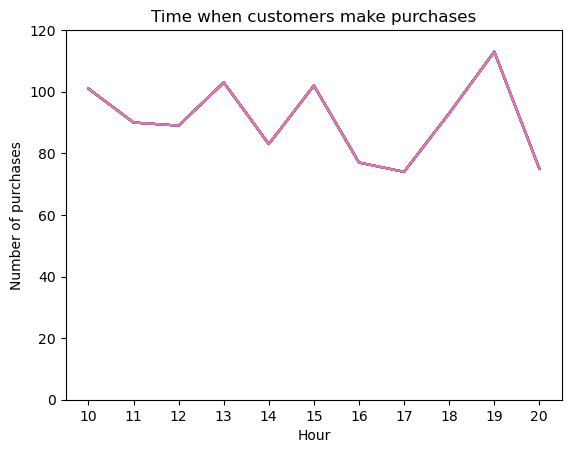

In [40]:
hours = [hour for hour, data in data.groupby('Hour')]

hours_ad_graph = data.groupby('Hour').count()

plt.plot(hours, hours_ad_graph)
plt.xticks(hours)
plt.ylim(0,120)
plt.title('Time when customers make purchases', size = 12)
plt.ylabel('Number of purchases')
plt.xlabel('Hour')
plt.show()

#Store is relatively busy throughout store opening times but peaks out at 13, 15 and 19
#13 - > after lunch
#15 - > after school?
#19 - > after work and dinner


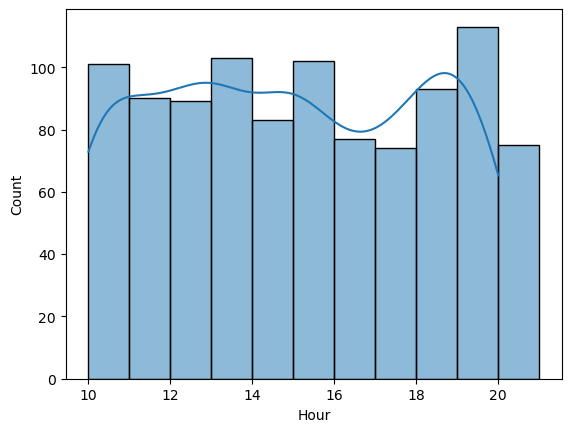

In [40]:
sns.histplot(x='Hour', data=data, kde=True, bins=[10,11,12,13,14,15,16,17,18,19,20,21]);

# Bivariate Analysis

#### Revenue/Profitability of product lines

In [41]:
#Assume probability is based on 'gross income' columns as profit is zero if considering gross income - tax of 5%

data_v3.groupby('Product line').sum()['gross income']
# Gross income 

Product line
Electronic accessories    2587.5015
Fashion accessories       2585.9950
Food and beverages        2673.5640
Health and beauty         2342.5590
Home and lifestyle        2564.8530
Sports and travel         2624.8965
Name: gross income, dtype: float64

In [42]:
data_v3.groupby('Customer type').sum()['gross income']

Customer type
Member    7820.164
Normal    7559.205
Name: gross income, dtype: float64

In [43]:
data_v3.groupby('Gender').sum()['gross income']

Gender
Female    7994.425
Male      7384.944
Name: gross income, dtype: float64

In [44]:
data_v3.groupby('City').sum()['gross income']

City
Mandalay     5057.0320
Naypyitaw    5265.1765
Yangon       5057.1605
Name: gross income, dtype: float64